In [1]:
import sys
sys.path.append('/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/')
print(sys.path[-1])

/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/


In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use("TkAgg")
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [19]:
truths = dict(luminosity_distance=2000., theta_jn=0.4, mass_1=36., mass_2=29.)
truths_alt = dict( mass_1=36., mass_2=29., luminosity_distance=2000., theta_jn=0.4)

In [5]:
def get_data(nested_samples, header_path):
    header = list(np.genfromtxt(header_path, dtype=str))
    if header[-1] is not 'logPrior':
        header.append('logPrior')
    print(f"Header: {header}")
    df = pd.read_csv(nested_samples, sep=" ", header=0, names=header, escapechar='#')
    return df

In [6]:
nested_samples = "./mount_dir/cpnest_nn_test/nested_samples.dat"
header_path = "./mount_dir/cpnest_nn_test/header.txt"

In [7]:
df_nn = get_data(nested_samples, header_path)

Header: ['luminosity_distance', 'theta_jn', 'mass_1', 'mass_2', 'logL', 'logPrior']


In [8]:
import corner

In [9]:
samples = df_nn.drop(["logL", "logPrior"], axis=1)

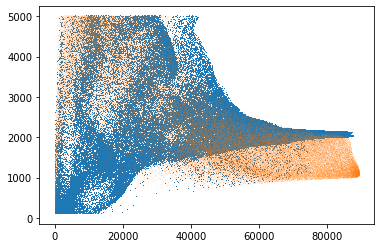

In [28]:
plt.plot(df_nn["luminosity_distance"], ',')
plt.plot(df_ns["luminosity_distance"], ',', alpha=0.1)

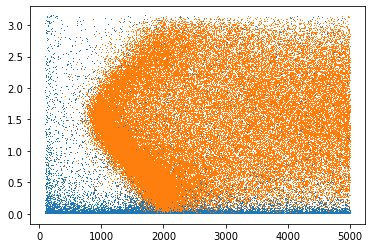

In [36]:
plt.plot(df_nn["luminosity_distance"], df_nn["theta_jn"], ',')
plt.plot(df_ns["luminosity_distance"], df_ns["theta_jn"], ',')

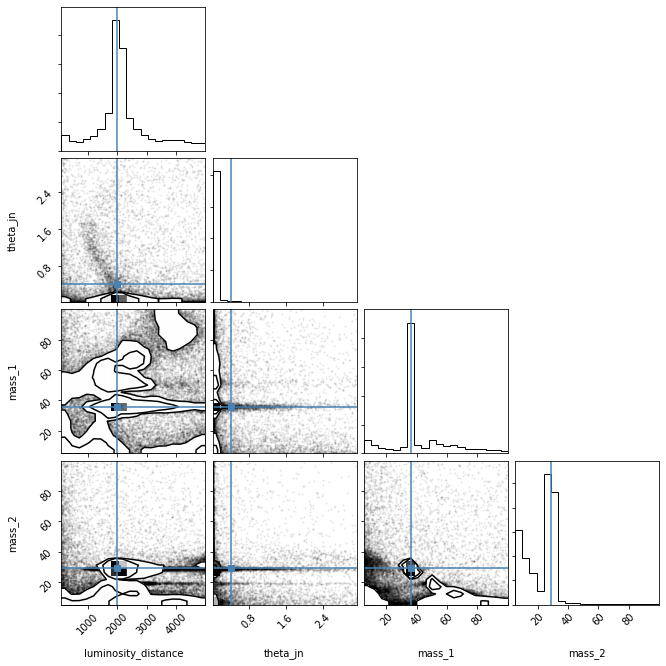

In [10]:
figure = corner.corner(samples, truths=list(truths.values()))
plt.show()

In [11]:
nested_samples_truth = "./mount_dir/cpnest_4_params_cpnest/nested_samples.dat"
header_truth = "./mount_dir/cpnest_4_params_cpnest/header.txt"
df_ns = get_data(nested_samples_truth, header_truth)

Header: ['mass_1', 'mass_2', 'luminosity_distance', 'theta_jn', 'logL', 'logPrior']


In [16]:
samples_truth = df_ns.drop(["logL", "logPrior"], axis=1)

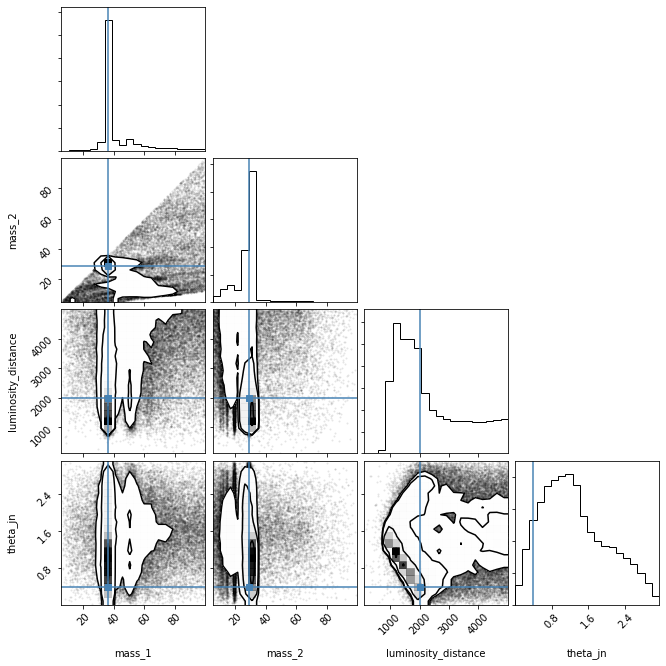

In [20]:
figure = corner.corner(samples_truth, truths=list(truths_alt.values()))
plt.show()